In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Multinomial Naïve Bayes

In [52]:
# reading tab seperated value
df = pd.read_csv('data.csv',sep='\t')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
#converting labels into numerical values

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


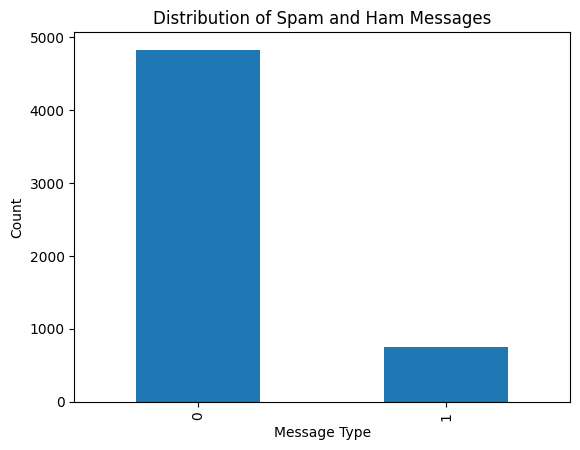

In [58]:
#visualizing the distribution of spam and ham messages
df['label'].value_counts().plot(kind='bar')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()


In [36]:
# convert text into feature vectors

cv = CountVectorizer()
X = cv.fit_transform(df['message']).toarray()
y = df['label'].values


(5572, 8713) (5572,)


In [42]:
# splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [44]:
# Training the Naive Bayes model on the Training set
classifier = MultinomialNB()
classifier.fit(X_train, y_train)    

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


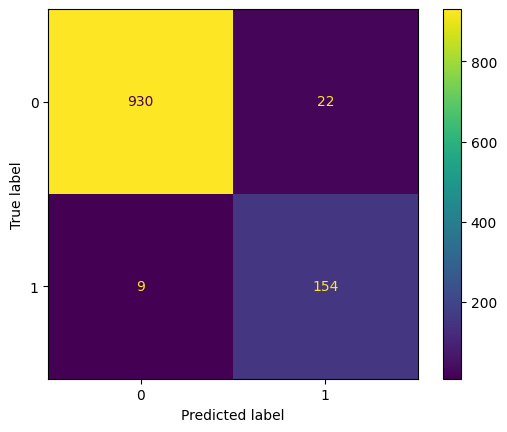

Accuracy: 97.22%


In [48]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

In [59]:
# export the model and vectorizer
import joblib
joblib.dump(classifier, 'spam_ham_model.joblib')
joblib.dump(cv, 'count_vectorizer.joblib')


['count_vectorizer.joblib']